# Data with Electric Cars
By [Solomon Stevens](https://github.com/Stone-Snevets/datafun-05-data-at-rest)    Date: September 22,2023

### Part 1: Find and Import csv File

In [1]:
# Imports
import pandas as pd

# Read in file
cars = pd.read_csv('https://raw.githubusercontent.com/recepilyasoglu/EDAandFeatureEngineeringonElectricCars/master/Electric_Vehicle_Population_Data.csv')

# Set floating value precision
pd.set_option('display.precision', 2)

# Can check if file successfully read in
cars.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.31e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.07e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.10e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.31e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.31e+10


### Part 2: Clean / Rename Data as Needed

In [2]:
# Rename Some Columns
cars.columns = ['VIN_#', 
                'County', 
                'City', 
                'US_State', 
                'Postal_Code', 
                'Year', 
                'Make', 
                'Model', 
                'EV_Type', 
                'CAFV_Eligible', 
                'Max_Range', 
                'Base_MSRP', 
                'Legislative_District',
                'DOL_ID',
                'Vehicle_Location',
                'Electric_Utility',
                '2020_Census_Tract']

# Show off new names
cars.head()

,VIN_#,County,City,US_State,Postal_Code,Year,Make,Model,EV_Type,CAFV_Eligible,Max_Range,Base_MSRP,Legislative_District,DOL_ID,Vehicle_Location,Electric_Utility,2020_Census_Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.31e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.07e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.10e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.31e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.31e+10


In [3]:
# Remove Unwanted columns
#-> These columns won't be of much use to what we are looking for
cars_clean = cars.drop(columns=['County', 'CAFV_Eligible', 'Base_MSRP', 'Legislative_District', '2020_Census_Tract'])

#Show new dataframe
cars_clean.head()

,VIN_#,City,US_State,Postal_Code,Year,Make,Model,EV_Type,Max_Range,DOL_ID,Vehicle_Location,Electric_Utility
0,5YJ3E1EB4L,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),322,127175366,POINT (-120.56916 46.58514),PACIFICORP
1,5YJ3E1EA7K,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220,266614659,POINT (-117.16171 32.71568),NaN
2,7JRBR0FL9M,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),22,144502018,POINT (-123.12802 44.09573),NaN
3,5YJXCBE21K,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),289,477039944,POINT (-120.56916 46.58514),PACIFICORP
4,5UXKT0C5XH,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),14,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC


### Part 3: Calculate Basic Statistical Information on Data

In [4]:
# Use describe() to calculate basic statistical information on cleaned data
cars_clean.describe()

,Postal_Code,Year,Max_Range,DOL_ID
count,124714.00,124716.00,124716.00,1.25e+05
mean,98163.83,2019.41,79.47,2.04e+08
std,2550.12,2.98,100.33,8.88e+07
min,1730.00,1997.00,0.00,4.38e+03
25%,98052.00,2018.00,0.00,1.54e+08
50%,98121.00,2020.00,25.00,2.00e+08
75%,98370.00,2022.00,200.00,2.28e+08
max,99701.00,2023.00,337.00,4.79e+08


### Part 4: Create Histograms of Numerical Data Columns

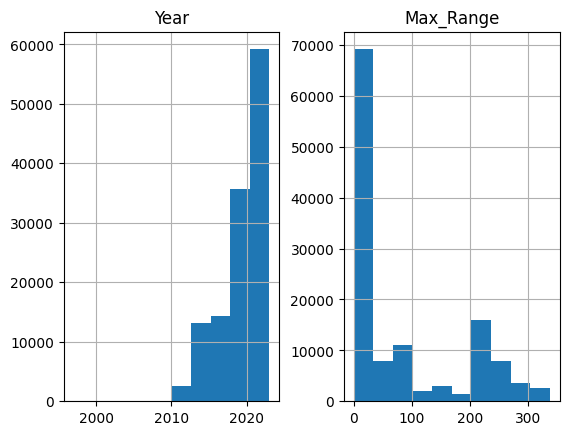

In [5]:
# Enable Matplotlib
%matplotlib inline

# Create historgrms of relevant numerical data
histogram = cars_clean.hist(['Year', 'Max_Range'])

### Part 5: Send data to html

In [6]:
cars_clean.to_html(buf='Cars_Clean_Html.html')